In [1]:
!pip install python-language-server[all]

  Created wheel for python-language-server: filename=python_language_server-0.31.2-cp37-none-any.whl size=46296 sha256=29b51d92d8e637cd9e2c4135f1a30fea6cc757240d9bb4a8a24c8c5eecdcf99a
  Stored in directory: C:\Users\Rocio\AppData\Local\pip\Cache\wheels\1f\7e\e4\0adb696b614fe5e44325a77a6065d3c64efd5ac0631cb75774
  Created wheel for python-jsonrpc-server: filename=python_jsonrpc_server-0.3.2-cp37-none-any.whl size=8978 sha256=3980243ba72f8e60bcae69c2719e2e54b9720915b1f5c4b7c6c99d0f5de86ef6
  Stored in directory: C:\Users\Rocio\AppData\Local\pip\Cache\wheels\0e\31\64\2ea449d43b937223bd299147506ae716c8b2246b8e2333271c
Successfully built python-language-server python-jsonrpc-server
  Found existing installation: jedi 0.13.3
    Uninstalling jedi-0.13.3:
      Successfully uninstalled jedi-0.13.3


In [9]:
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import functions as f
import data_prep as d
import operator
import seaborn as sns
from matplotlib import style
import pandas as pd
import numpy as np
import swifter
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
X, y = d.clean()

Upload
y_clean
null_value_drop
reset_indices
column_drop
x_clean
values_lower
column_lowercase
categorize_all



diagnoses_1_3



diagnoses_2_3



diagnoses_3_3



number_meds



num_down



num_up



X_dummy_variables
outliers_bin



outliers_log


In [3]:
X_train, X_test, y_train, y_test = f.standardize_train_test_split(X, y)

Test Accuracy score:  0.589561439558504
Test F1 score:  0.4373315587107293
Recall score:  0.589561439558504
Confusion matrix, without normalization


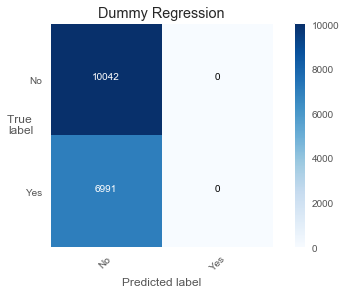

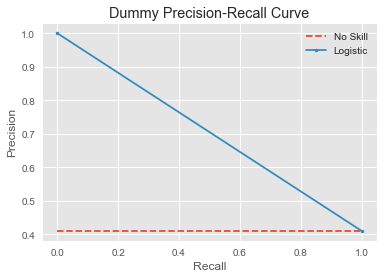

In [21]:
f.dummy_regression(X_train, X_test, y_train, y_test)

Mean Pre-Gridsearch Recall: 38.09%
Mean Training Score: 38.27%
Best Parameter Combination Found During Grid Search:
{'C': 5, 'fit_intercept': False, 'penalty': 'l2', 'tol': 0.0002, 'warm_start': True}
Test Accuracy score:  0.6208536370574766
Test F1 score:  0.584606481812029
Recall score:  0.6208536370574766
Confusion matrix, without normalization


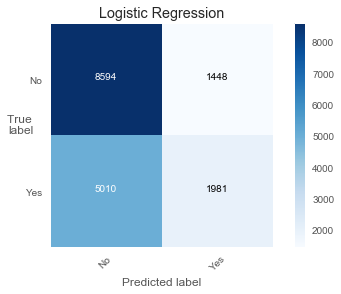

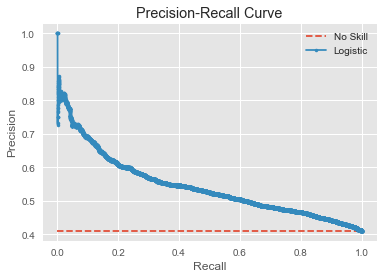

In [23]:
f.log_gridsearch(X_train, y_train, X_test, y_test)

In [14]:
X_train, X_test, y_train, y_test = f.standardize_train_test_split(X, y, rs=43)

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [19]:
rf_clf = RandomForestClassifier(random_state=42, bootstrap=True)

In [50]:
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'warm_start': [True, False],
}

In [51]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, n_jobs=-3,
                              scoring='recall', return_train_score=True, verbose=10)

In [52]:
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-3)]: Done   4 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-3)]: Done   9 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-3)]: Done  14 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-3)]: Done  21 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-3)]: Done  28 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-3)]: Done  37 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-3)]: Done  46 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-3)]: Done  57 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-3)]: Done  68 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-3)]: Done  81 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-3)]: Done  94 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-3)]: Done 141 tasks      | elapsed:  1

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-3,
             param_grid={'cr

Recall score:  0.594610462044267
Test Accuracy score:  0.594610462044267
Test F1 score:  0.57002080219585
Confusion matrix, without normalization


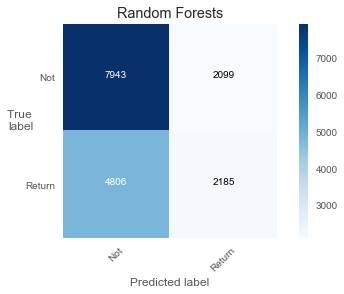

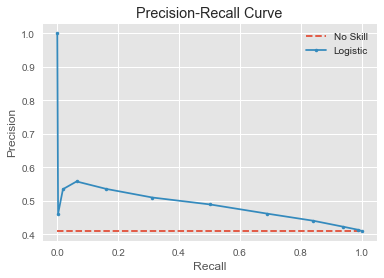

In [54]:
f.forests_gridsearch(X_train, y_train, X_test, y_test)

In [58]:
X_train, X_test, y_train, y_test = f.standardize_train_test_split(X, y, rs=44)

In [61]:
adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_param_grid = {
    'n_estimators': [40, 50, 60, 80, 100, 120],
    'learning_rate': [1.4, 1.2, 1.0, 0.8, 0.6, 0.4]
}
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3, n_jobs=-2,
                                    scoring='recall', return_train_score=True, verbose=10)
adaboost_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-3)]: Done   4 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-3)]: Done   9 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-3)]: Done  14 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-3)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-3)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-3)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-3)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-3)]: Done  57 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-3)]: Done  68 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-3)]: Done  81 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-3)]: Done  94 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-3)]: Done 105 out of 105 | elapsed:  7.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='warn', n_jobs=-3,
             param_grid={'learning_rate': [1.05, 1.0, 0.95, 0.9, 0.85],
                         'n_estimators': [40, 45, 50, 55, 60, 65, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=10)

In [3]:
X_train, X_test, y_train, y_test = f.standardize_train_test_split(X, y, rs=45)

In [20]:
gboost_clf = GradientBoostingClassifier(random_state=42, validation_fraction=0.2,
                                        n_iter_no_change=5, tol=0.01)
gboost_param_grid = {'n_estimators': [100, 300, 500],
                     'min_samples_split': [2, 3, 4],
                     'min_samples_leaf': [1, 2, 3],
                     'max_depth': [3, 4, 5, 6],
                     'warm_start': [True, False]
                     }
gboost_grid_search = GridSearchCV(gboost_clf, gboost_param_grid, cv=3,
                                  n_jobs=-2, scoring='recall',
                                  return_train_score=True, verbose=10)
gboost_grid_search.fit(X_train, y_train)
print("Best Parameter Combination Found During Grid Search:")
print(gboost_grid_search.best_params_)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 


[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 


[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 


[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 


[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True 


[Parallel(n_jobs=-2)]: Done   6 out of   6 | elapsed:    5.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True 


[Parallel(n_jobs=-2)]: Done   7 out of   7 | elapsed:    6.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True 


[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:    7.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False 


[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3,

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, m

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, mi

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3,

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, m

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, mi

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=True, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.15808297567954221, total=   0.9s
[CV] learning_rate=0.1, max_depth=3

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.1586552217453505, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, 

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=False, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=False, score=0.1586552217453505, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, mi

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=False, score=0.1586552217453505, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.1586552217453505, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_s

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.15391217279359176, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.14778254649499284, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.1586552217453505, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.15391217279359176, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=True, score=0.1625178826895565, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=True, score=0.1688125894134478, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.1625178826895565, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=True, score=0.1688125894134478, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.1625178826895565, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.1688125894134478, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, m

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.1625178826895565, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.1688125894134478, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, m

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=False, score=0.16194563662374822, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=False, score=0.1688125894134478, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.16180257510729615, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, mi

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=False, score=0.1688125894134478, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.16180257510729615, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.1688125894134478, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_s

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.16180257510729615, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.1688125894134478, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=True, score=0.161516452074392, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=True, score=0.1688125894134478, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.16306680017164926, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.161516452074392, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_s

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=True, score=0.1682403433476395, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.16249463596052066, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.15679542203147354, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.1682403433476395, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, 

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.16249463596052066, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.15679542203147354, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.1682403433476395, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.16249463596052066, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, 

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=False, score=0.15679542203147354, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=False, score=0.1682403433476395, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.16249463596052066, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.15679542203147354, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, mi

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=False, score=0.1682403433476395, total=   1.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.16249463596052066, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.15679542203147354, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.1682403433476395, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_s

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.16437768240343348, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.1669527896995708, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_s

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=True, score=0.16437768240343348, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=True, score=0.1669527896995708, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.16437768240343348, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, mi

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=True, score=0.1669527896995708, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.16437768240343348, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.1669527896995708, total=   1.6s
[CV] learning_rate=0.1, max_depth=4, m

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.16437768240343348, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.1669527896995708, total=   1.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.1634959233299957, total=   1.4s
[CV] learning_rate=0.1, max_depth=4, mi

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.1949928469241774, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.17453505007153075, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.1949928469241774, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=False, score=0.17453505007153075, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.1949928469241774, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.17453505007153075, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.1965665236051502, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.17610872675250358, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.18738377914461452, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.19456366237482117, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.17639484978540773, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.19456366237482117, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, 

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=True, score=0.18125894134477827, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.18652553282792161, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.19155937052932762, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.18125894134477827, total=   2.4s
[CV] learning_rate=0.1, max_depth=5

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.18652553282792161, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.19155937052932762, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.18125894134477827, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.18652553282792161, total=   2.3s
[CV] learning_rate=0.1, max_depth=5,

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.19155937052932762, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.18125894134477827, total=   2.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.18652553282792161, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.19155937052932762, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, m

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=False, score=0.1815450643776824, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.18652553282792161, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.19456366237482117, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.1815450643776824, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_s

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.19470672389127325, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.18240343347639484, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, mi

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.19470672389127325, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.18240343347639484, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.19470672389127325, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, 

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=True, score=0.18240343347639484, total=   2.4s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.19470672389127325, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.18240343347639484, total=   2.5s
[CV] learning_rate=0.1, max_depth=5

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.18738377914461452, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.19470672389127325, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.18240343347639484, total=   2.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.18738377914461452, total=   2.4s
[CV] learning_rate=0.1, max_depth=5,

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.18841201716738198, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.17696709585121603, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.18809898440852524, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.18841201716738198, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, m

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=False, score=0.17696709585121603, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.18809898440852524, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.18841201716738198, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.17696709585121603, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.18809898440852524, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.18841201716738198, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.17696709585121603, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.18809898440852524, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, mi

[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.18841201716738198, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.17696709585121603, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.18809898440852524, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.18841201716738198, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, 

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=True, score=0.19084406294706724, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.19625232441710772, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.196137339055794, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.19084406294706724, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, 

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.19367758546702904, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.20243204577968527, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.19070100143061516, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.19367758546702904, total=   3.2s
[CV] learning_rate=0.1, max_depth=6,

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.19341917024320457, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.19141630901287554, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.1943927907309398, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.19399141630901287, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, mi

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=False, score=0.19284692417739627, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2068373623229867, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.20257510729613734, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.19670958512160228, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2068373623229867, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.20257510729613734, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.19670958512160228, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2068373623229867, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.20257510729613734, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.19670958512160228, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2068373623229867, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.20257510729613734, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, m

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=True, score=0.19685264663805435, total=   3.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.1979688170504935, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.1932761087267525, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.19685264663805435, total=   3.4s
[CV] learning_rate=0.1, max_depth=6, 

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.19527896995708155, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.1792560801144492, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, mi

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.19527896995708155, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.1792560801144492, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.19527896995708155, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, min

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=False, score=0.1792560801144492, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.19527896995708155, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.1792560801144492, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_sa

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.19527896995708155, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.1792560801144492, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.1948219138892862, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_s

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.19728183118741058, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.18783977110157368, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.19839794020883994, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.19728183118741058, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, 

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=True, score=0.18783977110157368, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.19839794020883994, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.19728183118741058, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.18783977110157368, total=   3.2s
[CV] learning_rate=0.1, max_depth=6

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.19839794020883994, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.19728183118741058, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.18783977110157368, total=   3.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.19839794020883994, total=   3.3s
[CV] learning_rate=0.1, max_depth=6,

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.19728183118741058, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.18783977110157368, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.19839794020883994, total=   3.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.19728183118741058, total=   3.1s
[CV] learning_rate=0.1, max_depth=6, m

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=False, score=0.22074391988555078, total=   2.7s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.20583607495351167, total=   2.5s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.20600858369098712, total=   2.5s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.22074391988555078, total=   2.8s
[CV] learning_rate=0.2, max_depth=3, min

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, mi

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.20600858369098712, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, 

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=True, score=0.22074391988555078, total=   1.1s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.20583607495351167, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.20600858369098712, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.22074391988555078, total=   1.4s
[CV] learning_rate=0.2, max_depth=3

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.20583607495351167, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.20600858369098712, total=   2.5s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.22074391988555078, total=   2.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.20583607495351167, total=   2.4s
[CV] learning_rate=0.2, max_depth=3,

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.22074391988555078, total=   3.6s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.20583607495351167, total=   2.5s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, m

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=False, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.20583607495351167, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.20600858369098712, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.20583607495351167, total=   0.8s
[CV] learning_rate=0.2, max_depth=3, mi

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.20597911600629382, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, 

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=True, score=0.22074391988555078, total=   2.7s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.20597911600629382, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.22074391988555078, total=   2.8s
[CV] learning_rate=0.2, max_depth=3

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.20597911600629382, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.22074391988555078, total=   2.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.20597911600629382, total=   2.4s
[CV] learning_rate=0.2, max_depth=3,

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.22074391988555078, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.20597911600629382, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, m

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=False, score=0.21959942775393418, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.21959942775393418, total=   1.0s
[CV] learning_rate=0.2, max_depth=3, min

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.20600858369098712, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.21959942775393418, total=   1.1s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.20583607495351167, total=   0.9s
[CV] learning_rate=0.2, max_depth=3, mi

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.21959942775393418, total=   2.8s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.20583607495351167, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, 

[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=True, score=0.21959942775393418, total=   2.9s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.20583607495351167, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.20600858369098712, total=   2.4s
[CV] learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.21959942775393418, total=   2.9s
[CV] learning_rate=0.2, max_depth=4

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.22414532970962667, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.22203147353361946, total=   1.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2224606580829757, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.22285796023458732, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, 

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.22203147353361946, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2224606580829757, total=   1.5s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.22285796023458732, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.22203147353361946, total=   1.5s
[CV] learning_rate=0.2, max_depth=4, mi

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2224606580829757, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.22285796023458732, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.22160228898426323, total=   4.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2224606580829757, total=   4.2s
[CV] learning_rate=0.2, max_depth=4, min_s

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.22328708339293377, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2251788268955651, total=   4.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.22031473533619456, total=   2.6s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.22328708339293377, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2251788268955651, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.22031473533619456, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.22328708339293377, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2251788268955651, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, mi

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=True, score=0.22031473533619456, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.22328708339293377, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2251788268955651, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.22031473533619456, total=   4.0s
[CV] learning_rate=0.2, max_depth=4,

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.22328708339293377, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.22532188841201717, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.22031473533619456, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.22328708339293377, total=   3.8s
[CV] learning_rate=0.2, max_depth=4,

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.22031473533619456, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.22360515021459226, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.22414532970962667, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.22031473533619456, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, m

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=100, warm_start=False, score=0.22360515021459226, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.22414532970962667, total=   3.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.22031473533619456, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.22360515021459226, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.22414532970962667, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.22031473533619456, total=   3.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.22360515021459226, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.22414532970962667, total=   3.7s
[CV] learning_rate=0.2, max_depth=4, mi

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.22031473533619456, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.22360515021459226, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.22414532970962667, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.22031473533619456, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, 

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=True, score=0.22317596566523606, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.22500357602631954, total=   1.3s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.22389127324749641, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.22317596566523606, total=   1.5s
[CV] learning_rate=0.2, max_depth=4

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.22500357602631954, total=   3.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.22389127324749641, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.22317596566523606, total=   4.1s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.22500357602631954, total=   3.8s
[CV] learning_rate=0.2, max_depth=4,

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.22389127324749641, total=   3.9s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.22317596566523606, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.22500357602631954, total=   3.8s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.22389127324749641, total=   4.0s
[CV] learning_rate=0.2, max_depth=4, m

[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, warm_start=False, score=0.22317596566523606, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.22500357602631954, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.22389127324749641, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.22317596566523606, total=   1.4s
[CV] learning_rate=0.2, max_depth=4, min

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2365899013016736, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.22646638054363377, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2336194563662375, total=   5.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2365899013016736, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_s

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.22660944206008585, total=   2.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.23376251788268956, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.23401516235159492, total=   2.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.22660944206008585, total=   2.0s
[CV] learning_rate=0.2, max_depth=5, 

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=True, score=0.22989985693848355, total=   3.8s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.23401516235159492, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.22660944206008585, total=   5.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.22989985693848355, total=   5.7s
[CV] learning_rate=0.2, max_depth=5

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.23115434129595194, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.22947067238912733, total=   6.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.22989985693848355, total=   5.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.23115434129595194, total=   5.3s
[CV] learning_rate=0.2, max_depth=5,

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.22761087267525035, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.22989985693848355, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.23587469603776284, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.22761087267525035, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, m

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, warm_start=False, score=0.22989985693848355, total=   5.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.23587469603776284, total=   5.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.22761087267525035, total=   5.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.22989985693848355, total=  11.3s
[CV] learning_rate=0.2, max_depth=5, min

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.23587469603776284, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.22761087267525035, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.22989985693848355, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.23587469603776284, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, mi

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.23333333333333334, total=   5.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2301859799713877, total=   5.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.23229866971820912, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.23333333333333334, total=   5.9s
[CV] learning_rate=0.2, max_depth=5, m

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=True, score=0.22975679542203148, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.23558861393219854, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2251788268955651, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.22975679542203148, total=   2.1s
[CV] learning_rate=0.2, max_depth=5,

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.23558861393219854, total=   2.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2251788268955651, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.22975679542203148, total=   6.0s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.23558861393219854, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, 

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2251788268955651, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.22975679542203148, total=   6.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.23558861393219854, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2251788268955651, total=   5.3s
[CV] learning_rate=0.2, max_depth=5, min

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400, warm_start=False, score=0.22975679542203148, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.23558861393219854, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2251788268955651, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.22975679542203148, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.23530253182663424, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.22889842632331903, total=   5.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.22918454935622318, total=   5.7s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.23530253182663424, total=   5.3s
[CV] learning_rate=0.2, max_depth=5, mi

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.22889842632331903, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.22918454935622318, total=   2.1s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.23530253182663424, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.22889842632331903, total=   1.9s
[CV] learning_rate=0.2, max_depth=5, 

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=True, score=0.22918454935622318, total=   5.9s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.23530253182663424, total=   5.4s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.22889842632331903, total=   5.2s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.22918454935622318, total=   5.8s
[CV] learning_rate=0.2, max_depth=5

[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.23530253182663424, total=   5.5s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.22889842632331903, total=   2.3s
[CV] learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.22918454935622318, total=   2.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2393076813045344, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, 

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2380543633762518, total=   8.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.23948497854077253, total=   8.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2401659276212273, total=   7.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.23490701001430614, total=   7.4s
[CV] learning_rate=0.2, max_depth=6, min

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=500, warm_start=False, score=0.23562231759656652, total=   3.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2390215991989701, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2396280400572246, total=   2.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2369098712446352, total=   2.6s
[CV] learning_rate=0.2, max_depth=6, min_sa

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.24216850236017737, total=   8.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.23776824034334765, total=   7.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.23605150214592274, total=   7.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.24216850236017737, total=   7.5s
[CV] learning_rate=0.2, max_depth=6, mi

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2396280400572246, total=   2.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.23547925608011444, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2448862823630382, total=   2.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2396280400572246, total=   2.6s
[CV] learning_rate=0.2, max_depth=6, min

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=True, score=0.23547925608011444, total=   9.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2448862823630382, total=   7.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2396280400572246, total=   7.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.23547925608011444, total=   8.4s
[CV] learning_rate=0.2, max_depth=6, 

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2448862823630382, total=   3.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2396280400572246, total=   3.8s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.23547925608011444, total=   8.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2448862823630382, total=   7.6s
[CV] learning_rate=0.2, max_depth=6, mi

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2369098712446352, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.24034334763948498, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2440280360463453, total=   2.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2369098712446352, total=   2.8s
[CV] learning_rate=0.2, max_depth=6, min_

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2429184549356223, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2351594907738521, total=   6.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.23834048640915595, total=   7.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2429184549356223, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_sa

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2351594907738521, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.23834048640915595, total=   2.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2429184549356223, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2351594907738521, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, min_s

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.23834048640915595, total=   7.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2429184549356223, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2351594907738521, total=   6.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.23834048640915595, total=   7.3s
[CV] learning_rate=0.2, max_depth=6, mi

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2429184549356223, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2351594907738521, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.23834048640915595, total=   2.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2429184549356223, total=   3.0s
[CV] learning_rate=0.2, max_depth=6, m

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.23759118867114862, total=   7.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.23648068669527897, total=   7.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.23190271816881258, total=   8.1s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.23759118867114862, total=   7.0s
[CV] learning_rate=0.2, max_depth=6,

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.23648068669527897, total=   7.4s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.23190271816881258, total=   8.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.23759118867114862, total=   7.0s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.23648068669527897, total=   7.3s
[CV] learning_rate=0.2, max_depth=6, m

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=200, warm_start=False, score=0.23190271816881258, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.23759118867114862, total=   2.5s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.23648068669527897, total=   2.6s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.23190271816881258, total=   2.9s
[CV] learning_rate=0.2, max_depth=6, min

[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.23759118867114862, total=   6.7s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.23648068669527897, total=   7.3s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.23190271816881258, total=   7.9s
[CV] learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.2, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.23759118867114862, total=   6.8s
[CV] learning_rate=0.2, max_depth=6, mi

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, 

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.23773422972393077, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.22045779685264663, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.23333333333333334, total=   1.1s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.23773422972393077, total=   1.9s
[CV] learning_rate=0.3, max_depth=3,

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.22045779685264663, total=   5.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.23333333333333334, total=   5.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.23773422972393077, total=   3.6s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.22045779685264663, total=   2.4s
[CV] learning_rate=0.3, max_depth=3, m

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, warm_start=False, score=0.23333333333333334, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.22045779685264663, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.23333333333333334, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, mi

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, 

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=True, score=0.23333333333333334, total=   2.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.22045779685264663, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.23333333333333334, total=   2.8s
[CV] learning_rate=0.3, max_depth=3

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.23773422972393077, total=   2.6s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.22045779685264663, total=   2.6s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.23333333333333334, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.23773422972393077, total=   2.6s
[CV] learning_rate=0.3, max_depth=3,

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.22045779685264663, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.23333333333333334, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.23773422972393077, total=   2.6s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.22045779685264663, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, m

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, warm_start=False, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.22045779685264663, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.23333333333333334, total=   1.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.23773422972393077, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, mi

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.22017167381974248, total=   2.0s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2330472103004292, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.22017167381974248, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, m

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2330472103004292, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.22017167381974248, total=   2.4s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2330472103004292, total=   2.7s
[CV] learning_rate=0.3, max_depth=3, 

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.22017167381974248, total=   2.4s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2330472103004292, total=   2.8s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.23773422972393077, total=   2.5s
[CV] learning_rate=0.3, max_depth=3, 

[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.22017167381974248, total=   0.9s
[CV] learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2330472103004292, total=   1.0s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.24359891288799884, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2474964234620887, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2369098712446352, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.24359891288799884, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2474964234620887, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2369098712446352, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_sa

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.24359891288799884, total=   3.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2474964234620887, total=   3.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2374821173104435, total=   3.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.24359891288799884, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, min_

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2474964234620887, total=   3.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2374821173104435, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.24359891288799884, total=   3.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2474964234620887, total=   3.7s
[CV] learning_rate=0.3, max_depth=4, min

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=True, score=0.23505007153075821, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.24345587183521672, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.24792560801144492, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.23505007153075821, total=   1.3s
[CV] learning_rate=0.3, max_depth=4

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.24345587183521672, total=   1.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.24792560801144492, total=   1.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.23505007153075821, total=   1.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.24345587183521672, total=   3.0s
[CV] learning_rate=0.3, max_depth=4,

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.24792560801144492, total=   3.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.23505007153075821, total=   3.8s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.24345587183521672, total=   4.1s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.24792560801144492, total=   4.0s
[CV] learning_rate=0.3, max_depth=4, m

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, warm_start=False, score=0.23505007153075821, total=   3.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.24345587183521672, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.24792560801144492, total=   3.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.23505007153075821, total=   4.7s
[CV] learning_rate=0.3, max_depth=4, min

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2448862823630382, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2447782546494993, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2463519313304721, total=   1.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2448862823630382, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_sa

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2447782546494993, total=   3.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2463519313304721, total=   3.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2448862823630382, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2447782546494993, total=   3.5s
[CV] learning_rate=0.3, max_depth=4, min_

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2463519313304721, total=   3.9s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2448862823630382, total=   3.5s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2447782546494993, total=   3.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2463519313304721, total=   4.0s
[CV] learning_rate=0.3, max_depth=4, mi

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2448862823630382, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2447782546494993, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2463519313304721, total=   1.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2448862823630382, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.24163090128755366, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.23819742489270387, total=   1.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.24603061078529537, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.24163090128755366, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, m

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, warm_start=False, score=0.23819742489270387, total=   5.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.24603061078529537, total=   6.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.24163090128755366, total=   5.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.23819742489270387, total=   3.6s
[CV] learning_rate=0.3, max_depth=4, min

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.24603061078529537, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.24163090128755366, total=   3.6s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.23819742489270387, total=   3.7s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.24603061078529537, total=   3.4s
[CV] learning_rate=0.3, max_depth=4, mi

[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.24163090128755366, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.23819742489270387, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.24603061078529537, total=   1.2s
[CV] learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.24163090128755366, total=   1.3s
[CV] learning_rate=0.3, max_depth=4, 

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=True, score=0.25565092989985694, total=   5.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.25418395079387784, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.24935622317596567, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.25565092989985694, total=   5.5s
[CV] learning_rate=0.3, max_depth=5

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.25418395079387784, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.24949928469241775, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.25565092989985694, total=   5.3s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.25418395079387784, total=   4.9s
[CV] learning_rate=0.3, max_depth=5,

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2492131616595136, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.255793991416309, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.25418395079387784, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.2492131616595136, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_s

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=300, warm_start=False, score=0.25507868383404864, total=   5.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.25418395079387784, total=   5.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.24449213161659514, total=   5.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.25507868383404864, total=   6.3s
[CV] learning_rate=0.3, max_depth=5, min

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.25532827921613505, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.24577968526466382, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.24220314735336196, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.25532827921613505, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, mi

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.24577968526466382, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.24220314735336196, total=   2.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.25532827921613505, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.24577968526466382, total=   3.8s
[CV] learning_rate=0.3, max_depth=5, 

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=True, score=0.24220314735336196, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.25532827921613505, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.24577968526466382, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.24220314735336196, total=   5.0s
[CV] learning_rate=0.3, max_depth=5

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.25518523816335287, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2503576537911302, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.24220314735336196, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.25518523816335287, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, 

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2516452074391989, total=   4.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2440629470672389, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2516092118437992, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2516452074391989, total=   4.9s
[CV] learning_rate=0.3, max_depth=5, min_s

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2440629470672389, total=   4.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2516092118437992, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2516452074391989, total=   4.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2440629470672389, total=   4.7s
[CV] learning_rate=0.3, max_depth=5, min_sam

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2516092118437992, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2516452074391989, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2440629470672389, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2516092118437992, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_sa

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2516452074391989, total=   4.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2440629470672389, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2516092118437992, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2516452074391989, total=   4.8s
[CV] learning_rate=0.3, max_depth=5, min_

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=True, score=0.24849785407725322, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.25361178658274924, total=   1.7s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2447782546494993, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.24849785407725322, total=   1.8s
[CV] learning_rate=0.3, max_depth=5,

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.25361178658274924, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2447782546494993, total=   2.0s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.24849785407725322, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.25361178658274924, total=   2.9s
[CV] learning_rate=0.3, max_depth=5, 

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2447782546494993, total=   5.2s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.24849785407725322, total=   5.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.25361178658274924, total=   5.1s
[CV] learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2447782546494993, total=   5.2s
[CV] learning_rate=0.3, max_depth=5, min

[CV]  learning_rate=0.3, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500, warm_start=False, score=0.24849785407725322, total=   1.8s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2694893434415677, total=   2.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.257653791130186, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.25836909871244634, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_sa

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2693463023887856, total=   6.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.26108726752503575, total=   6.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.25793991416309014, total=   6.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2693463023887856, total=   6.2s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2575107296137339, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.26509298998569386, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.276498355027893, total=   2.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2575107296137339, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=True, score=0.25565092989985694, total=   6.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2767844371334573, total=   6.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.255793991416309, total=   6.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.25565092989985694, total=   6.1s
[CV] learning_rate=0.3, max_depth=6, m

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2772135602918038, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.25350500715307583, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.263519313304721, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2772135602918038, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.25350500715307583, total=   6.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.263519313304721, total=   7.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2772135602918038, total=  12.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.25350500715307583, total=   6.7s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=100, warm_start=False, score=0.263519313304721, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2772135602918038, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.25350500715307583, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.263519313304721, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, min_samp

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2679158918609641, total=   6.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.25851216022889845, total=   6.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.25793991416309014, total=   6.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2679158918609641, total=   6.3s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2646638054363376, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2620886981402003, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.26577027606923187, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2646638054363376, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2620886981402003, total=   7.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.26577027606923187, total=   6.1s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2646638054363376, total=   6.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2620886981402003, total=   6.8s
[CV] learning_rate=0.3, max_depth=6, m

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.26577027606923187, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2646638054363376, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2620886981402003, total=   2.5s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.26577027606923187, total=   2.3s
[CV] learning_rate=0.3, max_depth=6, m

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2646638054363376, total=   6.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2620886981402003, total=   6.9s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.26577027606923187, total=   7.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2646638054363376, total=  12.3s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=200, warm_start=False, score=0.25736766809728184, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2686310971248748, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.26108726752503575, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.25736766809728184, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2686310971248748, total=   7.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.26108726752503575, total=   6.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.25736766809728184, total=   6.7s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2686310971248748, total=   6.7s
[CV] learning_rate=0.3, max_depth=6, min_

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.26108726752503575, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.25736766809728184, total=   2.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2686310971248748, total=   2.3s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.26108726752503575, total=   2.2s
[CV] learning_rate=0.3, max_depth=6, m

[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=True, score=0.25736766809728184, total=   6.6s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2686310971248748, total=   6.4s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.26108726752503575, total=   6.0s
[CV] learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.3, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.25736766809728184, total=   6.6s
[CV] learning_rate=0.3, max_depth=6,

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.24760406236589902, total=   3.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2419170243204578, total=   2.3s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.24760406236589902, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, m

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2419170243204578, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.24760406236589902, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2419170243204578, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.24760406236589902, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.2419170243204578, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_sa

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.24760406236589902, total=   1.4s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2419170243204578, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.24760406236589902, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.2240343347639485, total=   3.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.2419170243204578, total=   4.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.24760406236589902, total=   5.2s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2240343347639485, total=   2.1s
[CV] learning_rate=0.4, max_depth=3, min

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2419170243204578, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.24760406236589902, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2419170243204578, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, m

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.24760406236589902, total=   2.1s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.24760406236589902, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, m

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.24760406236589902, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.24760406236589902, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2240343347639485, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_sa

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.24760406236589902, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2419170243204578, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.24760406236589902, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2419170243204578, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.24760406236589902, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2419170243204578, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.24760406236589902, total=   2.5s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2240343347639485, total=   2.0s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2419170243204578, total=   2.4s
[CV] learning_rate=0.4, max_depth=3, m

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.24002288656844514, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.22417739628040056, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.24002288656844514, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, 

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.22417739628040056, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.24002288656844514, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.22417739628040056, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, mi

[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.24002288656844514, total=   0.8s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.22417739628040056, total=   0.7s
[CV] learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2419170243204578, total=   0.9s
[CV] learning_rate=0.4, max_depth=3, min_s

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2587612644829066, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.248068669527897, total=   3.0s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.23834048640915595, total=   4.6s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2587612644829066, total=   3.3s
[CV] learning_rate=0.4, max_depth=4, min_sa

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.248068669527897, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.23834048640915595, total=   3.3s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2587612644829066, total=   3.3s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.248068669527897, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_s

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=True, score=0.23834048640915595, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2587612644829066, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.248068669527897, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.23834048640915595, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, m

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2587612644829066, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.248068669527897, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.23834048640915595, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2587612644829066, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.24821173104434907, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.24735336194563662, total=   3.5s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2587612644829066, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.24821173104434907, total=   3.0s
[CV] learning_rate=0.4, max_depth=4, mi

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, warm_start=False, score=0.24735336194563662, total=   3.4s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2587612644829066, total=   3.3s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.24821173104434907, total=   3.0s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.24735336194563662, total=   3.4s
[CV] learning_rate=0.4, max_depth=4, min_

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2587612644829066, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.24821173104434907, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.24735336194563662, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2587612644829066, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.248068669527897, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.24735336194563662, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2587612644829066, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.248068669527897, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_s

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2536480686695279, total=   3.3s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2594764697468173, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.24778254649499284, total=   3.0s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2536480686695279, total=   3.5s
[CV] learning_rate=0.4, max_depth=4, m

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2594764697468173, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.24778254649499284, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2536480686695279, total=   3.6s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2594764697468173, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, mi

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.24778254649499284, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2536480686695279, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2594764697468173, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.24778254649499284, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2536480686695279, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2594764697468173, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.24778254649499284, total=   1.0s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2536480686695279, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_sa

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.25218137605492774, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.24492131616595136, total=   2.9s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2530758226037196, total=   3.4s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.25218137605492774, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.24492131616595136, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2530758226037196, total=   3.5s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.25218137605492774, total=   3.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.24492131616595136, total=   3.1s
[CV] learning_rate=0.4, max_depth=4, m

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2530758226037196, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.25218137605492774, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.24492131616595136, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2530758226037196, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, 

[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.25218137605492774, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.24492131616595136, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2530758226037196, total=   1.2s
[CV] learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.25218137605492774, total=   1.1s
[CV] learning_rate=0.4, max_depth=4, 

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.27682403433476394, total=   4.9s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2602288984263233, total=   4.1s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.28379344871978257, total=   5.7s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.27682403433476394, total=   7.6s
[CV] learning_rate=0.4, max_depth=5, mi

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, warm_start=False, score=0.26008583690987125, total=   4.2s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.28379344871978257, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2765379113018598, total=   5.0s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.26008583690987125, total=   3.1s
[CV] learning_rate=0.4, max_depth=5, min_

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.28422257187812905, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.27682403433476394, total=   1.8s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.25994277539341915, total=   1.5s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.28422257187812905, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, mi

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2593705293276109, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2593705293276109, total=   4.1s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.28379344871978257, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2593705293276109, total=   4.3s
[CV] learning_rate=0.4, max_depth=5, min

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=True, score=0.26494992846924176, total=   2.8s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2809326276641396, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2592274678111588, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.26494992846924176, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, 

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2809326276641396, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2592274678111588, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.26494992846924176, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2809326276641396, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, mi

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2592274678111588, total=   4.5s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.26494992846924176, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2809326276641396, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2592274678111588, total=   4.5s
[CV] learning_rate=0.4, max_depth=5, min_

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=400, warm_start=False, score=0.26609442060085836, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2682019739665284, total=   1.4s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.25908440629470675, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.26609442060085836, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2785009297668431, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2620886981402003, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2648068669527897, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2785009297668431, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_sa

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2620886981402003, total=   4.2s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2648068669527897, total=   4.7s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2785009297668431, total=   4.5s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2620886981402003, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2648068669527897, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2785009297668431, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2620886981402003, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2648068669527897, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, mi

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2785009297668431, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2620886981402003, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2648068669527897, total=   1.7s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2763553139751109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2593705293276109, total=   4.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.26280400572246065, total=   4.5s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2763553139751109, total=   4.3s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2593705293276109, total=   4.4s
[CV] learning_rate=0.4, max_depth=5, min_

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=500, warm_start=False, score=0.26280400572246065, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2763553139751109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2593705293276109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.26280400572246065, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_s

[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2763553139751109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2593705293276109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.26280400572246065, total=   1.7s
[CV] learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2763553139751109, total=   1.6s
[CV] learning_rate=0.4, max_depth=5, min_s

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2726752503576538, total=   5.6s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.27525035765379113, total=   5.6s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2773566013445859, total=   5.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2726752503576538, total=   6.0s
[CV] learning_rate=0.4, max_depth=6, min

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2748211731044349, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.28493777714203977, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2723891273247496, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2748211731044349, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, m

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2797882992418824, total=   4.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.26437768240343346, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.27639484978540774, total=   5.6s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2797882992418824, total=   4.9s
[CV] learning_rate=0.4, max_depth=6, m

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2739628040057225, total=   5.3s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.27682403433476394, total=   5.6s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2806465455585753, total=   5.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2739628040057225, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2708154506437768, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2766413960806752, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2729613733905579, total=   2.2s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2708154506437768, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_sam

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2766413960806752, total=   6.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2729613733905579, total=   6.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2708154506437768, total=   5.5s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2766413960806752, total=   5.5s
[CV] learning_rate=0.4, max_depth=6, min_sa

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2729613733905579, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2708154506437768, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2766413960806752, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2729613733905579, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=True, score=0.271101573676681, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.28493777714203977, total=   5.6s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.27424892703862663, total=   5.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.271101573676681, total=   5.3s
[CV] learning_rate=0.4, max_depth=6, mi

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2693463023887856, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.27896995708154504, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2679542203147353, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2693463023887856, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, mi

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.27896995708154504, total=   5.5s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2679542203147353, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2693463023887856, total=   5.3s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.27896995708154504, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2679542203147353, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2693463023887856, total=   5.2s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.27896995708154504, total=   5.3s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2679542203147353, total=   5.4s
[CV] learning_rate=0.4, max_depth=6, min_sa

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2693463023887856, total=   1.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.27896995708154504, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2679542203147353, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2693463023887856, total=   2.0s
[CV] learning_rate=0.4, max_depth=6, min_s

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2755364806866953, total=   5.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2869814020028612, total=   6.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.277499642397368, total=  10.0s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2755364806866953, total=   8.1s
[CV] learning_rate=0.4, max_depth=6, min_s

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2869814020028612, total=   2.2s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.277499642397368, total=   1.8s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2755364806866953, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2869814020028612, total=   2.2s
[CV] learning_rate=0.4, max_depth=6, min

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.277499642397368, total=   4.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2755364806866953, total=   5.9s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2869814020028612, total=   6.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.277499642397368, total=   5.0s
[CV] learning_rate=0.4, max_depth=6, min_s

[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2755364806866953, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2869814020028612, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.277499642397368, total=   1.8s
[CV] learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.4, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2755364806866953, total=   2.1s
[CV] learning_rate=0.4, max_depth=6, min_sa

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, warm_start=False, score=0.23619456366237482, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.2484623086825919, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.24606580829756797, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.23619456366237482, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2484623086825919, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.24606580829756797, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.23619456366237482, total=   1.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.24606580829756797, total=   3.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.23619456366237482, total=   1.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.24606580829756797, total=   3.4s
[CV] learning_rate=0.5, max_depth=3, m

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=True, score=0.23619456366237482, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.24606580829756797, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.23619456366237482, total=   1.9s
[CV] learning_rate=0.5, max_depth=3,

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.2459227467811159, total=   2.2s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.23662374821173104, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2484623086825919, total=   1.2s
[CV] learning_rate=0.5, max_depth=3, mi

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2459227467811159, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.23662374821173104, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2484623086825919, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2459227467811159, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=400, warm_start=False, score=0.23662374821173104, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2484623086825919, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2459227467811159, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.23662374821173104, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_s

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2459227467811159, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.23662374821173104, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_s

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2459227467811159, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.23676680972818312, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2484623086825919, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2459227467811159, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=True, score=0.23676680972818312, total=   1.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2484623086825919, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2459227467811159, total=   3.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.23676680972818312, total=   3.9s
[CV] learning_rate=0.5, max_depth=3, 

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2484623086825919, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2459227467811159, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.23676680972818312, total=   1.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2484623086825919, total=   2.0s
[CV] learning_rate=0.5, max_depth=3, mi

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2459227467811159, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.23676680972818312, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.24789014447146332, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2459227467811159, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, warm_start=False, score=0.24849785407725322, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.24789014447146332, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2459227467811159, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.24849785407725322, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.24789014447146332, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2459227467811159, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.24849785407725322, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False, score=0.24789014447146332, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2459227467811159, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.24849785407725322, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.24789014447146332, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2459227467811159, total=   2.1s
[CV] learning_rate=0.5, max_depth=3, mi

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2701001430615165, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2785009297668431, total=   3.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2505007153075823, total=   2.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2701001430615165, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, mi

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2785009297668431, total=   3.3s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2505007153075823, total=   1.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2701001430615165, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2785009297668431, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2505007153075823, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2701001430615165, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2787870118724074, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2505007153075823, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_s

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2701001430615165, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2787870118724074, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.269241773962804, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2701001430615165, total=   2.8s
[CV] learning_rate=0.5, max_depth=4, min_samp

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2789300529251895, total=   4.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2520743919885551, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.2665236051502146, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2789300529251895, total=   3.3s
[CV] learning_rate=0.5, max_depth=4, min_sa

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2520743919885551, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2665236051502146, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2789300529251895, total=   3.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2520743919885551, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2665236051502146, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2789300529251895, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2520743919885551, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.2665236051502146, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, mi

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2789300529251895, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.250071530758226, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2665236051502146, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2789300529251895, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.25779685264663804, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.2679542203147353, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.2789300529251895, total=   3.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.25779685264663804, total=   2.8s
[CV] learning_rate=0.5, max_depth=4, min

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, warm_start=False, score=0.2679542203147353, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2789300529251895, total=   3.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.25779685264663804, total=   2.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.2679542203147353, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_sa

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2789300529251895, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.25779685264663804, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.2679542203147353, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False, score=0.2789300529251895, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_s

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.25779685264663804, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.2679542203147353, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.2789300529251895, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.25779685264663804, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, mi

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=True, score=0.26609442060085836, total=   6.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.2785009297668431, total=   4.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.25793991416309014, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.26609442060085836, total=   4.7s
[CV] learning_rate=0.5, max_depth=4,

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.2785009297668431, total=   3.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.25793991416309014, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.26609442060085836, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2785009297668431, total=   3.2s
[CV] learning_rate=0.5, max_depth=4, m

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.25793991416309014, total=   2.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.26609442060085836, total=   3.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.2785009297668431, total=   1.5s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.25793991416309014, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, mi

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, warm_start=False, score=0.26609442060085836, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.2785009297668431, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.25793991416309014, total=   1.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.26609442060085836, total=   1.1s
[CV] learning_rate=0.5, max_depth=4, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.29380632241453297, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.2729613733905579, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=True, score=0.2869814020028612, total=   3.8s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=400, warm_start=False, score=0.29380632241453297, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.2729613733905579, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=True, score=0.28798283261802576, total=   3.8s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2950936918895723, total=   4.1s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=400, warm_start=False, score=0.2729613733905579, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=True, score=0.28798283261802576, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2950936918895723, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.2729613733905579, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=400, warm_start=False, score=0.28798283261802576, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, 

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.29380632241453297, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.2821173104434907, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=400, warm_start=False, score=0.28683834048640916, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=500, warm_start=True, score=0.29380632241453297, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, 

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.26180257510729615, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=400, warm_start=False, score=0.27639484978540774, total=   3.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True, score=0.2965241024173938, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=500, warm_start=True, score=0.26180257510729615, total=   3.8s
[CV] learning_rate=0.5, max_depth=5, mi

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=400, warm_start=False, score=0.27639484978540774, total=   3.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.2965241024173938, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.26180257510729615, total=   3.8s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=500, warm_start=True, score=0.27639484978540774, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.2965241024173938, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.26180257510729615, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=True, score=0.27639484978540774, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2965241024173938, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2636623748211731, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=True, score=0.2783977110157368, total=   3.7s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2952367329423545, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=500, warm_start=False, score=0.2636623748211731, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=True, score=0.28726752503576536, total=   3.7s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.29280503504505795, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.2782546494992847, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=500, warm_start=False, score=0.28726752503576536, total=   3.6s
[CV] learning_rate=0.5, max_depth=5,

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.29280503504505795, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.2782546494992847, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=500, warm_start=False, score=0.28726752503576536, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=100, warm_start=True, score=0.29280503504505795, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, 

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.2782546494992847, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=500, warm_start=False, score=0.28726752503576536, total=   2.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True, score=0.29280503504505795, total=   4.1s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2782546494992847, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500, warm_start=False, score=0.28726752503576536, total=   3.6s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.30138749821198685, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2832618025751073, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=100, warm_start=True, score=0.2745350500715308, total=   3.6s
[CV] learning_rate=0.5, max_depth=5, min_s

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.30138749821198685, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2832618025751073, total=   1.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=True, score=0.2745350500715308, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=100, warm_start=False, score=0.30138749821198685, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2832618025751073, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=True, score=0.2745350500715308, total=   1.3s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False, score=0.30138749821198685, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2832618025751073, total=   1.4s
[CV] learning_rate=0.5, max_depth=5, min

[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=True, score=0.2745350500715308, total=   3.7s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.30138749821198685, total=   3.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2832618025751073, total=   4.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100, warm_start=False, score=0.2745350500715308, total=   3.6s
[CV] learning_rate=0.5, max_depth=5, m

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.3158346445429838, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2805436337625179, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False, score=0.2955650929899857, total=   5.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, warm_start=True, score=0.3158346445429838, total=   4.9s
[CV] learning_rate=0.5, max_depth=6, min

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.2709585121602289, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, warm_start=False, score=0.29542203147353363, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True, score=0.3164068087541124, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=200, warm_start=True, score=0.2709585121602289, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, warm_start=False, score=0.2811158798283262, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.3083965097983121, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.271101573676681, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, warm_start=True, score=0.2811158798283262, total=   4.5s
[CV] learning_rate=0.5, max_depth=6, min_samp

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.3086825919038764, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.28140200286123035, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=True, score=0.2815450643776824, total=   1.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, warm_start=False, score=0.3086825919038764, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_s

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.28068669527896994, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=True, score=0.29713876967095854, total=   2.0s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False, score=0.30996996137891575, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=200, warm_start=False, score=0.28068669527896994, total=   2.8s
[CV] learning_rate=0.5, max_depth=6, 

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=True, score=0.29713876967095854, total=   5.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.30996996137891575, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.28068669527896994, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=200, warm_start=False, score=0.29713876967095854, total=   5.1s
[CV] learning_rate=0.5, max_depth=6

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.30996996137891575, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.28068669527896994, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=200, warm_start=False, score=0.29713876967095854, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=6, n_estimators=300, warm_start=True, score=0.30996996137891575, total=   1.7s
[CV] learning_rate=0.5, max_depth=6,

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.28125894134477825, total=   4.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, warm_start=False, score=0.2924177396280401, total=   5.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True, score=0.3132599055929052, total=   4.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=3, min_samples_split=8, n_estimators=300, warm_start=True, score=0.28125894134477825, total=   4.9s
[CV] learning_rate=0.5, max_depth=6, min

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=200, warm_start=False, score=0.28125894134477825, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.31068516664282647, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.271244635193133, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=300, warm_start=True, score=0.28125894134477825, total=   4.5s
[CV] learning_rate=0.5, max_depth=6, min_s

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.31068516664282647, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.271244635193133, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=True, score=0.28125894134477825, total=   1.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=300, warm_start=False, score=0.31068516664282647, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.271244635193133, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=True, score=0.28125894134477825, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False, score=0.31068516664282647, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=6, n_estimators=300, warm_start=False, score=0.271244635193133, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=True, score=0.28125894134477825, total=   2.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.31068516664282647, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.271244635193133, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=5, min_samples_split=8, n_estimators=300, warm_start=False, score=0.28125894134477825, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, 

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.31097124874839077, total=   1.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.27424892703862663, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=300, warm_start=False, score=0.29070100143061517, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=400, warm_start=True, score=0.31097124874839077, total=   1.7s
[CV] learning_rate=0.5, max_depth=6,

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.27424892703862663, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=300, warm_start=False, score=0.29070100143061517, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True, score=0.31097124874839077, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=4, n_estimators=400, warm_start=True, score=0.27424892703862663, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, m

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=300, warm_start=False, score=0.29070100143061517, total=   1.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.31097124874839077, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.27424892703862663, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=6, n_estimators=400, warm_start=True, score=0.29070100143061517, total=   1.7s
[CV] learning_rate=0.5, max_depth=6, min

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.31097124874839077, total=   3.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.27424892703862663, total=   4.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=True, score=0.29070100143061517, total=   4.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=False 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=400, warm_start=False, score=0.31097124874839077, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, mi

[Parallel(n_jobs=-2)]: Done 9600 out of 9600 | elapsed: 459.4min finished


Best Parameter Combination Found During Grid Search:
{'learning_rate': 0.5, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'warm_start': True}


In [11]:
def x_clean(x_val):
    """Cleans string values in X database"""
    print('x_clean')
    x_val['race'] = x_val.race.replace({'AfricanAmerican': 'race_black',
                                        'Asian': 'race_other', 'Hispanic': 'race_other',
                                        'Other': 'race_other'})
    x_val['max_glu_serum'] = x_val.max_glu_serum.replace({'None': 0, 'Norm': 1,
                                                          '>200': 2, '>300': 3})
    x_val['age'] = x_val.age.replace({'[0-10)': 0, '[10-20)': 0,
                                      '[20-30)': 0, '[30-40)': 1,
                                      '[40-50)': 2, '[50-60)': 3,
                                      '[60-70)': 4, '[70-80)': 5,
                                      '[80-90)': 6, '[90-100)': 7})
    x_val['A1Cresult'] = x_val.A1Cresult.replace({'None': 0, 'Norm': 1, '>7': 2,
                                                  ">8": 3})
    x_val = x_val.rename(columns={'admission_type_id': 'at_id',
                                  'discharge_disposition_id': 'dd_id',
                                  'admission_source_id': 'as_id',
                                  'number_outpatient': 'outpatient',
                                  'number_emergency': 'emergency',
                                  'number_inpatient': 'inpatient'})
    x_val['at_id'] = x_val.at_id.replace({1: 'at_urgent', 2: 'at_urgent', 3: 'at_not_urgent',
                                          5: 'at_no_info', 6: 'at_no_info', 7: 'at_urgent',
                                          8: 'at_no_info'})
    x_val['dd_id'] = x_val['dd_id'].replace({1: 'dd_home', 2: 'dd_care', 3: 'dd_care', 4: 'dd_care',
                                             5: 'dd_care', 6: 'dd_care_home', 7: 'dd_other',
                                             8: 'dd_care_home', 9: 'dd_care', 10: 'dd_care',
                                             12: 'dd_care',
                                             15: 'dd_care',
                                             16: 'dd_care',
                                             17: 'dd_care',
                                             18: 'no_info',
                                             22: 'dd_care_lt',
                                             23: 'dd_care_lt',
                                             24: 'dd_care_lt',
                                             25: 'dd_no_info',
                                             27: 'dd_care_lt',
                                             28: 'dd_care_lt'})
    x_val['as_id'] = x_val['as_id'].replace({1: 'as_referral',
                                             2: 'as_referral',
                                             3: 'as_referral',
                                             4: 'as_transfer_other',
                                             5: 'as_transfer_other',
                                             6: 'as_transfer_other',
                                             7: 'as_transfer_er',
                                             9: 'as_no_info',
                                             10: 'as_transfer_other',
                                             11: 'as_transfer_other',
                                             12: 'as_transfer_other',
                                             13: 'as_transfer_other',
                                             14: 'as_transfer_other',
                                             15: 'as_no_info',
                                             17: 'as_no_info',
                                             20: 'as_no_info',
                                             22: 'as_transfer_other',
                                             25: 'as_transfer_other'})
    return x_val

SyntaxError: unexpected EOF while parsing (<ipython-input-11-43773c839138>, line 15)